# Notebook  11 - Basi di Machine Learning

Questa lezione utilizza le librerie Keras e Tensorflow per sviluppare alcuni fit di funzioni polinomiali a una e due variabili

   - [  11.1 - Miglioramento Fit Lineare ](#ex-11.1) 

   - [  11.2 - Fit Polinomiale ](#ex-11.2) 
   
   - [  11.3 - Fit Bidimensionale ](#ex-11.3)
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

<a id="ex-11.1"></a>
## Esercizio 11.1 - Miglioramento Fit Lineare
Il primo esercizio consiste nel valutare il fit di una retta: 
$$
f(x)=2x+1
$$
Questo fit viene operato tramite una rete neurale sequenziale, in cui un solo neurone riceve un input $x$ e restituisce come output $y = wx+b$, dove $w$ e $b$ sono i parametri da valutare. Questi parametri verranno calcolati in maniera differente a seconda di come vengono forniti i seguenti parametri strutturali:
- <b> $\sigma$ </b>: I dati vengono generati attorno ai valori di $w$ e $b$ con un peso Gaussiano, dunque modificare la varianza con cui vengono generati comporta che i risultati siano diversi.
- <b> $N_{train}$ </b>: Il numero di dati generati su cui verrà allenato il modello. Sono invece detti $N_{validation}$ quelli su cui il modello viene testato una volta pronto, per determinarne la bontà.
- <b> $N_{epoch}$ </b>: Il numero di volte in cui i dati vengono fatti passare attraverso la rete neurale per ottenere i risultati del fit. I dati vengono solitamente divisi in dei blocchi minori, detti <i> batch </i>, si dice che è passata un'epoca quando tutti i batch sono passati per la rete.

Modificando questi tre parametri si vuole studiare come varia la bontà del fit.

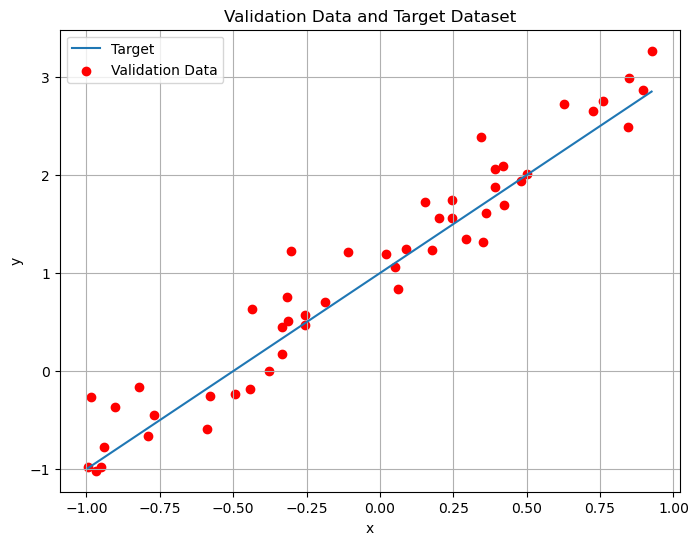

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 17ms/step - loss: 1.1622 - mse: 1.1622 - val_loss: 1.2828 - val_mse: 1.2828
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 1.0529 - mse: 1.0529 - val_loss: 1.1739 - val_mse: 1.1739
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.9533 - mse: 0.9533 - val_loss: 1.0744 - val_mse: 1.0744
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.8625 - mse: 0.8625 - val_loss: 0.9805 - val_mse: 0.9805
Epoch 5/50
50/50 [=============

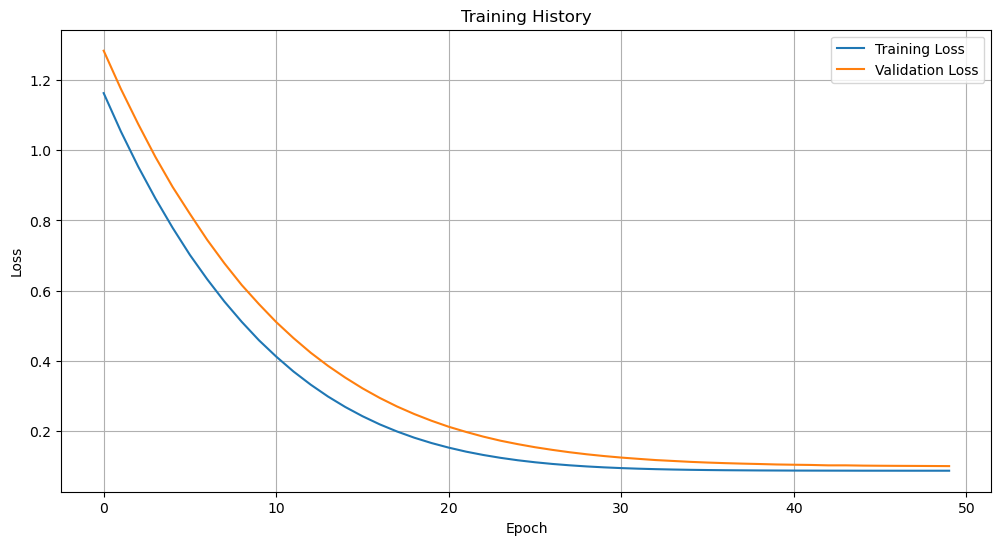

In [16]:
# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Generate training inputs
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
m = 2  # Slope
b = 1  # Intercept
sigma = 0.3  # Noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)
y_target = m * x_valid + b

# Plot validation data and target dataset
plt.figure(figsize=(8, 6))
plt.plot(x_valid, y_target, label='Target')
plt.scatter(x_valid, y_valid, color='r', label='Validation Data')
plt.title('Validation Data and Target Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Construct the neural network model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    batch_size=10,
                    epochs=50,
                    verbose=1)

# Evaluate the model on validation data
loss, mse = model.evaluate(x_valid, y_valid)
print('\nPerformance on Validation Data:')
print('Loss:', loss)
print('Mean Squared Error:', mse)

# Evaluate the model on target data
loss, mse = model.evaluate(x_valid, y_target)
print('\nPerformance on Target Data:')
print('Loss:', loss)
print('Mean Squared Error:', mse)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


4/4 [==============================] - 0s 4ms/step


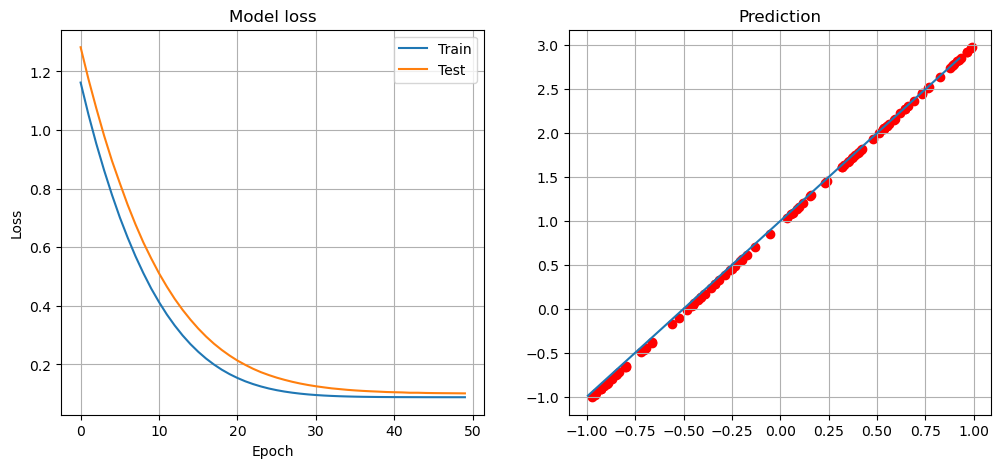

In [17]:
plt.figure(figsize=(12, 5))
# Plot Performance
plt.subplot(1, 2, 1)  # Create a subplot with 1 row, 2 columns, and select the first plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

# Plot Model
plt.subplot(1, 2, 2)  # Select the second plot
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r')
plt.plot(x_valid, y_target)
plt.title('Prediction')
plt.grid(True)

plt.show()


Di seguito si elencano i risultati ottenuti con diversi valori dei parametri. Gli errori sono valutati rispetto al set di validation.

In [18]:
import pandas as pd
data = {
    'N_epochs': [50, 50, 50, 50],
    'N_train': [1000, 1000, 1000, 1000],
    'sigma': [0.5, 0.4, 0.3, 0],
    'Error': [0.2052, 0.1311, 0.0739, '≈ 0']
}

df = pd.DataFrame(data)

print(df)

   N_epochs  N_train  sigma   Error
0        50     1000    0.5  0.2052
1        50     1000    0.4  0.1311
2        50     1000    0.3  0.0739
3        50     1000    0.0     ≈ 0


Come è realistico, diminuendo il rumore con cui vengono generati i dati, l'errore tende a 0. Si proverà ora a mantenere a $\sigma = 0.3$ questo errore e modificare il numero di dati di training. I dati di validation verranno mantenuti fissi nella proporzione di un decimo di quelli di training


In [19]:
import pandas as pd

data = {
    'N_epochs': [50, 50, 50, 50],
    'N_train': [100, 500, 1000, 5000],
    'sigma': [0.3, 0.3, 0.3, 0.3],
    'Error': [0.0737, 0.1002, 0.0738, 0.0858]
}

df = pd.DataFrame(data)

print(df)

   N_epochs  N_train  sigma   Error
0        50      100    0.3  0.0737
1        50      500    0.3  0.1002
2        50     1000    0.3  0.0738
3        50     5000    0.3  0.0858


L'errore in questo caso si mantiene attorno ad un valore costante, con anche la possibilità di aumentare, dato che avere più dati significa non poterli prevedere tutti con esattezza. È inevitabile che un aumento dei dati comporti un doppio effetto: da una parte il modello migliora, dall'altra aumenta l'errore di previsione perchè calcolato su più dati. L'effetto complessivo non è un miglioramento netto. </br>
Per lo studio sulle epoche, si è scelto di mantenere $\sigma = 0.5$, per testare su dati che abbiano un errore di partenza più alto.

In [20]:
import pandas as pd

data = {
    'N_epochs': [10, 30, 50, 100],
    'N_train': [100, 100, 100, 100],
    'sigma': [0.5, 0.5, 0.5, 0.5],
    'Error': [0.8912, 0.0776, 0.0740, 0.0738]
}

df = pd.DataFrame(data)
print(df)



   N_epochs  N_train  sigma   Error
0        10      100    0.5  0.8912
1        30      100    0.5  0.0776
2        50      100    0.5  0.0740
3       100      100    0.5  0.0738


In questo caso l'errore diminuisce, come è prevedibile. Tuttavia dato che l'aumento di epoche aumenta in maniera considerevole il tempo di esecuzione, e l'errore non diminuisce così tanto, non è conveniente investire sul numero di epoche. </br>

<a id="ex-11.2"></a>
## Esercizio 11.2 - Fit Polinomiale
Si vuole ora estendere la tecnica usata ad una funzione polinomiale 
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

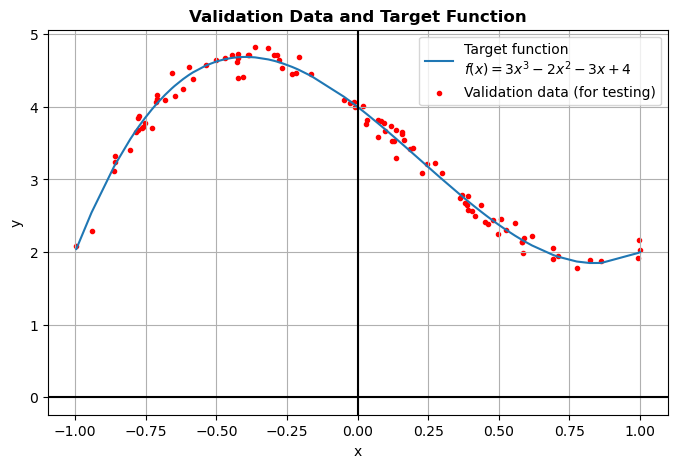

Epoch 1/8
157/157 [==============================] - 2s 6ms/step - loss: 5.5952 - mse: 5.5952 - val_loss: 0.6224 - val_mse: 0.6224
Epoch 2/8
157/157 [==============================] - 0s 3ms/step - loss: 0.3702 - mse: 0.3702 - val_loss: 0.1391 - val_mse: 0.1391
Epoch 3/8
157/157 [==============================] - 0s 3ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 4/8
157/157 [==============================] - 0s 3ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 5/8
157/157 [==============================] - 0s 3ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 6/8
157/157 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 7/8
157/157 [==============================] - 0s 2ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 8/8
157/157 [==============================] - 0s 2ms/step - loss: 0.0201 - m

In [21]:
N_epochs = 8
N_train = 5000
N_valid = 100
sigma = 0.1

# Define target function f(x)
def f(x):
    return 3 * x**3 - 2 * x**2 - 3 * x + 4

# Generate random data for training and validation
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = f(x_valid)
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

# Plot validation and target datasets
plt.figure(figsize=(8, 5))
plt.plot(x_valid, y_target, label="Target function\n$f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker=".", color='r', label='Validation data (for testing)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation Data and Target Function", fontweight="bold")
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.grid(True)
plt.legend()
plt.show()

model = tf.keras.Sequential()
# Activation: relu, elu, sigmoid, tanh, etc.
activation = 'relu'
model.add(Dense(40, input_shape=(1,), activation=activation))
model.add(Dense(20, activation=activation))
model.add(Dense(10, activation=activation))
model.add(Dense(5, activation=activation))
model.add(Dense(1, activation=None))

optimizer = 'rmsprop'
loss_function = 'mse'
model.compile(optimizer=optimizer, loss=loss_function, metrics=['mse'])
history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=N_epochs,
                    shuffle=True,                        
                    validation_data=(x_valid, y_valid))


TEST DATA evaluation
Test loss:      0.027346253395080566
Test accuracy:  0.027346253395080566

EXACT CURVE evaluation
Test loss:      0.0141656044870615
Test accuracy:  0.0141656044870615
4/4 [==============================] - 0s 5ms/step


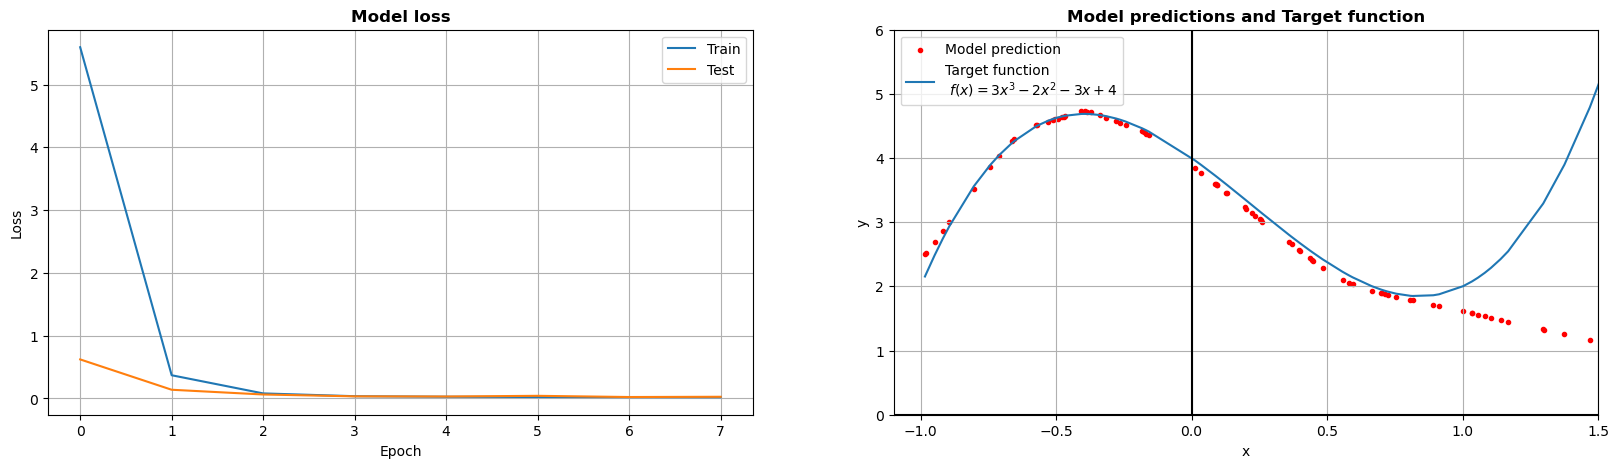

In [22]:
# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

plt.figure(figsize=(20,5))

# Plot training & validation loss values
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
#plt.show()

# generate predictions
x_predicted = np.random.uniform(-1, 2, 100) 
y_predicted = model.predict(x_predicted) # ha dimensione diversa da x_predicted se non finisco con un solo nodo

# plot
plt.subplot(1,2,2)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = f(x_predicted) # target polinomial function
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1.1,1.5)
plt.ylim(0,6)
plt.title("Model predictions and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

È interessante notare come la capacità di previsione del modello si restringa al range selezionato, infatti le previsioni per $x > 1$ sono profondamente diverse dalla funzione di target.

<a id="ex-11.3"></a>
## Esercizio 11.3 - Fit Bidimensionale
Si vuole ora provare ad applicare questo procedimento ad una funzione bidimensionale

$$
f(x,y) = \sin(x^2+y^2)
$$ 
Nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

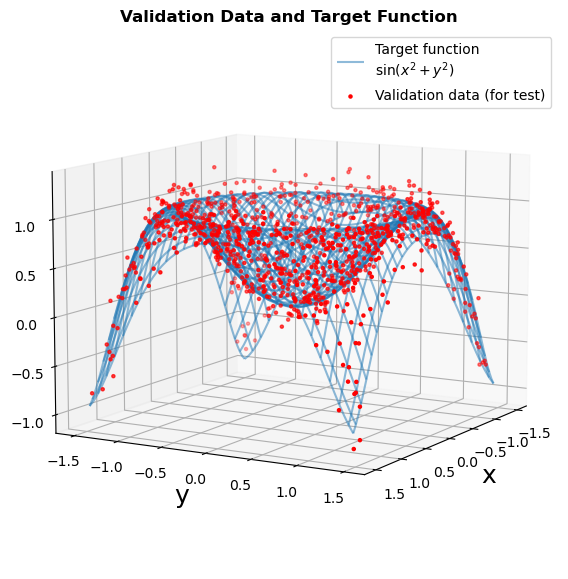

In [23]:
N_epochs = 50
N_train = 8000
N_valid = 1000
Sigma = 0.1

np.random.seed(0)
lim = 3./2.

# Generate random data for training and validation
x_train = np.random.uniform(-lim, lim, N_train)
x_valid = np.random.uniform(-lim, lim, N_valid)

y_train = np.random.uniform(-lim, lim, N_train)
y_valid = np.random.uniform(-lim, lim, N_valid)

XY_train = np.column_stack((x_train, y_train))
XY_valid = np.column_stack((x_valid, y_valid))

def f(x, y):
    return np.sin(x**2 + y**2)

z_target = f(x_valid, y_valid)  # Target function

sigma = Sigma
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

# Plot validation data and target dataset
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(-lim, lim, 0.05)
y_surf = np.arange(-lim, lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf),
                  rstride=2, cstride=2,
                  label='Target function\n$\\sin(x^2+y^2)$',
                  alpha=0.5)
ax.scatter(x_valid, y_valid, z_valid, marker=".", color="r", label='Validation data (for test)')
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.set_zlabel("z", fontsize=18)
plt.title("Validation Data and Target Function", fontweight="bold")
ax.legend()
ax.view_init(10, 30)

plt.show()


In [24]:
model = Sequential([
    Dense(40, input_shape=(2,), activation='tanh'),
    Dense(38, activation='tanh'),
    Dense(35, activation='tanh'),
    Dense(13, activation='tanh'),
    Dense(1, activation='tanh')
])

# Print the model summary
model.summary()

# Compile the model, choosing optimizer, loss, and metrics objects
optimizer = tf.keras.optimizers.legacy.RMSprop()
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss, metrics=['mse'])

# Train the model
history = model.fit(
    x=XY_train, y=z_train, 
    batch_size=32, epochs=N_epochs,
    shuffle=True,
    validation_data=(XY_valid, z_valid)
)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                120       
                                                                 
 dense_16 (Dense)            (None, 38)                1558      
                                                                 
 dense_17 (Dense)            (None, 35)                1365      
                                                                 
 dense_18 (Dense)            (None, 13)                468       
                                                                 
 dense_19 (Dense)            (None, 1)                 14        
                                                                 
Total params: 3525 (13.77 KB)
Trainable params: 3525 (13.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
250/250 [

TEST DATA evaluation
Test loss: 0.012096536345779896
Test accuracy: 0.012096536345779896

63/63 [==============================] - 0s 2ms/step


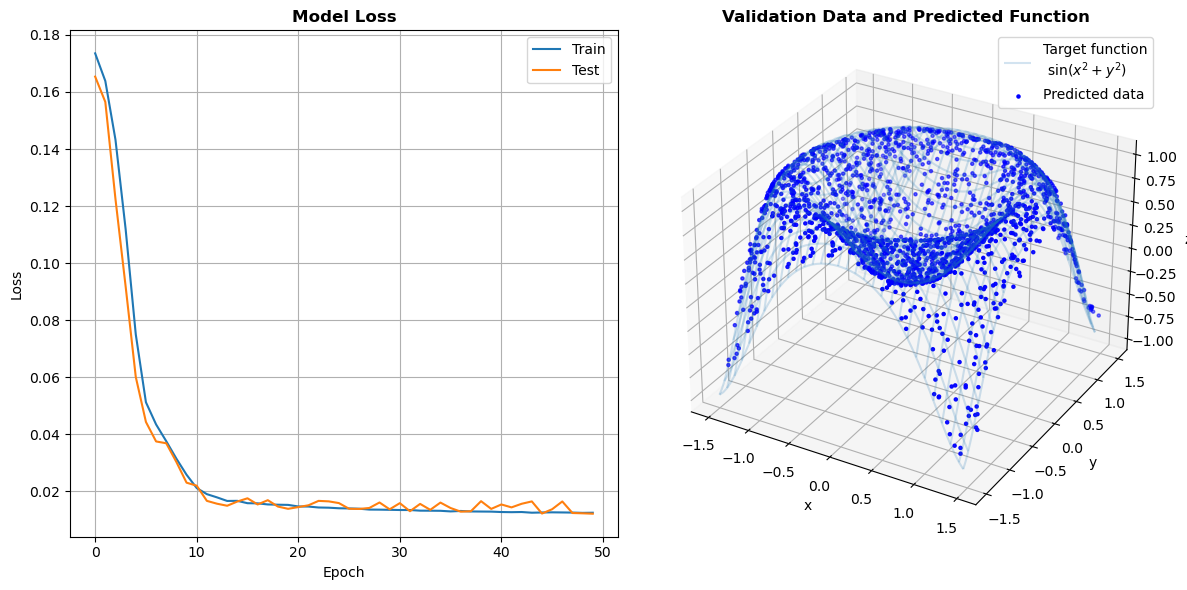

In [25]:
# Evaluate with test data
print("TEST DATA evaluation")
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# Plot model loss and validation data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot model loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Loss', fontweight='bold')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')
ax1.grid()

# Remove the existing subplot to avoid the warning
if len(ax2.figure.axes) > 0:
    ax2.figure.axes[-1].remove()

# Generate predicted data
x_predicted = np.random.uniform(-lim, lim, 2000)
y_predicted = np.random.uniform(-lim, lim, 2000)
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

# Plot validation data and predicted function
ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf), rstride=2, cstride=2, label='Target function\n $\sin(x^2+y^2)$', alpha=0.2)
ax2.scatter(x_predicted, y_predicted, z_predicted, marker=".", color="r", label='Predicted data')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Validation Data and Predicted Function', fontweight='bold')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()
